<a href="https://colab.research.google.com/github/Soukainaz/Course-DataScience/blob/main/Machine%20Learning/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv('drive/MyDrive/Machine Learning/meteo.csv')

# Data Cleaning

*Our data doesn't contain any missing values*

In [ ]:
data = data.drop(['Year', 'Hour', 'Minute', 'Unnamed: 0'], axis=1)

In [ ]:
data['pluie.demain'] = data['pluie.demain'].astype(int)

In [ ]:
threshold = 0.95
correlation_matrix = data.corr()
# Find and drop highly correlated columns
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
# Drop the highly correlated columns
data_filtered = data.drop(columns=to_drop)
print("Dropped columns:", to_drop)


Dropped columns: ['Wind.Speed.daily.mean..80.m.above.gnd.', 'Wind.Direction.daily.mean..80.m.above.gnd.', 'Temperature.daily.max..2.m.above.gnd.', 'Temperature.daily.min..2.m.above.gnd.', 'Mean.Sea.Level.Pressure.daily.max..MSL.', 'Mean.Sea.Level.Pressure.daily.min..MSL.']


<ipython-input-6-85a8b21028b2>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))


# PCA

In [ ]:
from sklearn.model_selection import train_test_split
features = data.columns[:-1]
X = data[features]
target = data['pluie.demain']
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X, target, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(train_features)
X_test_std = sc.transform(test_features)

In [ ]:
cov_mat = np.cov(X_train_std.T)
eigen_val, eigen_vects = np.linalg.eig(cov_mat)
sorted_indices = np.argsort(eigen_val)[::-1]
eigenvalues = eigen_val[sorted_indices]
eigenvectors = eigen_vects[:, sorted_indices]

In [ ]:
scaled_data = data.copy()
scaled_data = pd.DataFrame(sc.fit_transform(scaled_data), columns=scaled_data.columns)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
pca.fit(scaled_data)
X = pca.transform(scaled_data)

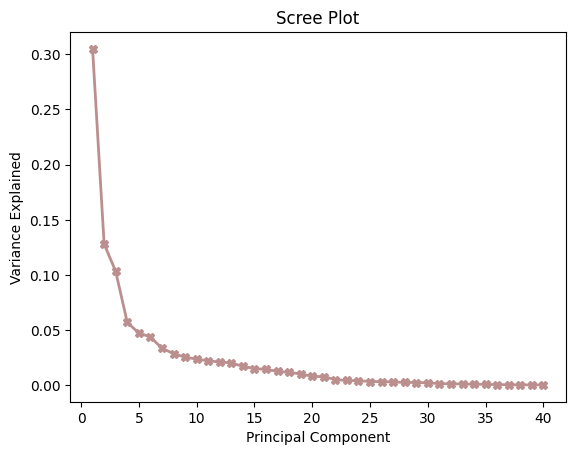

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'X-', linewidth=2, color='rosybrown')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Text(0, 0.5, 'pc2')

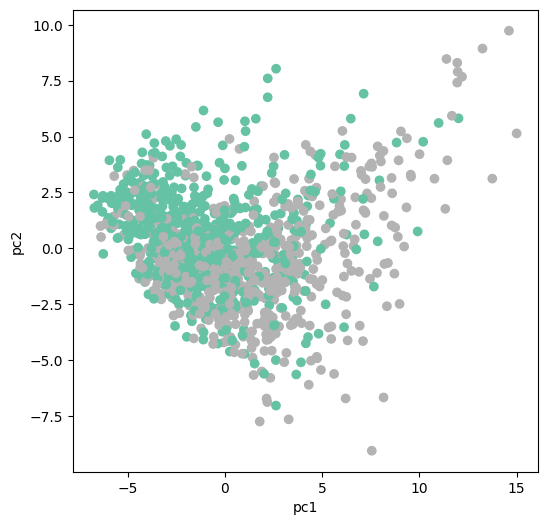

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],c=target,cmap='Set2')
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0.5, 0, 'PC3')

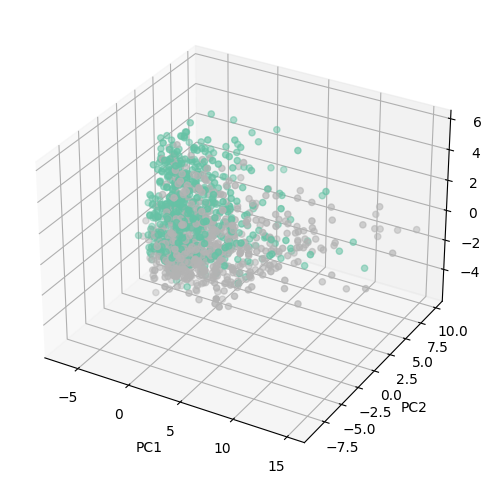

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6,6))
axis = fig.add_subplot(111, projection='3d')
axis.scatter(X[:,0],X[:,1],X[:,2], c=target,cmap='Set2')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

In [ ]:
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

IndexError: ignored

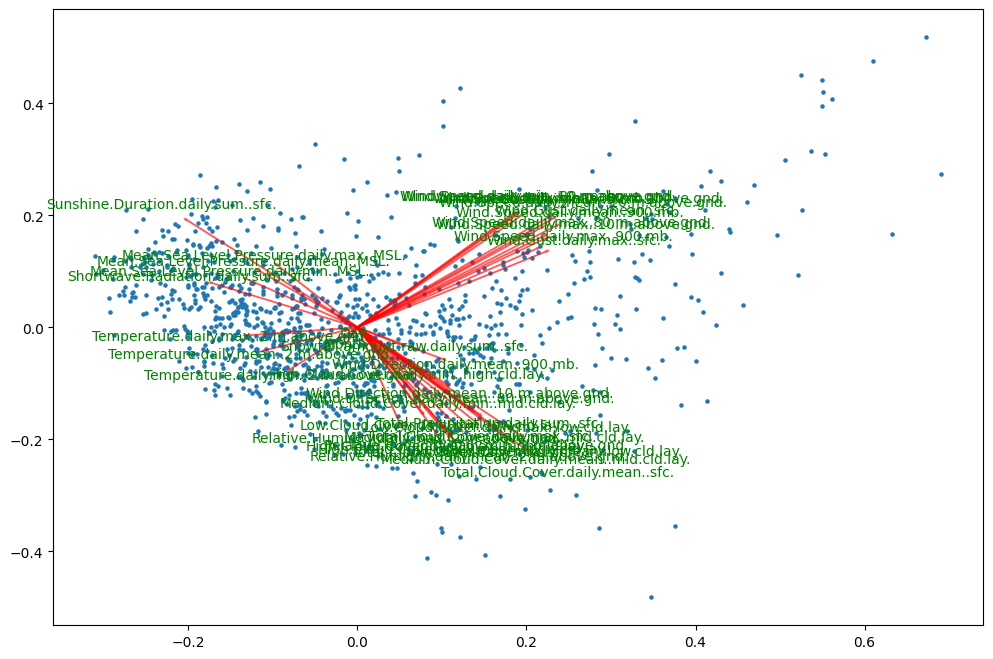

In [ ]:
plt.figure(figsize=(12, 8))
biplot(X, np.transpose(pca.components_), list(features))